## Умова лабораторної роботи

### Модель класифікації

Побудувати моделi класифiкацiї на основi методу дерев рiшень, використовуючи  `sklearn.tree.DecisionTreeClassifier`з рiзними значеннями гiперпараметрiв.

### Початкові дані


(a) dataset_Malicious_and_Benign_Websites.csv</br> 
(b)
```python
import numpy as np
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
```

### Завдання

1. Представити початковi данi графiчно.
2. Розбити данi на навчальний та валiдацiйний набори.
3. Побудувати на навчальному наборі даних моделі класифікації.
4. Представити моделі графічно.
5. Виконати прогнози на основі побудованих моделей.
6. Для кожної з моделей оцінити, чи має місце перенавчання.
7. Побудувати границі рішень графічно для кожної з моделей.
8. Розрахувати для кожної моделі значення наступних критеріїв якості:
    * матрицю неточностей (confusion matrix),
    * точність (precision),
    * повноту (recall),
    * міру F1 (F1 score),
    * побудувати криву точності-повноти (precision-recall(PR) curve), ROC-криву, показник AUC.
9. Спробувати виконати решітчастий пошук (grid search) для підбору гіпeрпараметрів моделей.
10. Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi спробувати обрати найкращу модель.
11. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.


## Метрики якості

$TP$: Кількість справжніх позитивних прикладів.</br>
$FN$: Кількість помилкових негативних прикладів.</br>
$FP$: Кількість помилкових позитивних прикладів.</br>
$TN$: Кількість справжніх негативних прикладів.</br>

### True Positive Rate (TPR)
True Positive Rate (TPR) - визначається як кількість справжніх позитивних результатів на кількість справжніх позитивних результатів плюс кількість помилкових позитивних результатів.
$$\text{TPR} = \frac{TP}{TP + FN}$$

### False Positive Rate 
False Positive Rate(FPR) -визначається як кількість справжніх позитивних результатів на кількість справжніх позитивних результатів плюс кількість помилкових негативних.
$$\text{FPR} = \frac{FP}{FP + TN}$$

### Precision
Precision (Точність) - це здатність класифікатора не позначати як позитивний зразок, який є негативним.
$$\text{Precision} = \frac{TP}{TP + FP}$$

### Recall 
Recall (Повнота) - це здатність класифікатора знаходити всі позитивні зразки.
$$\text{Recall} = \frac{TP}{TP + FN}$$
### ROC крива
ROC(Receiver Operating Characteristic) крива - будується на основі TPR та FPR для різних порогів класифікації.

Лінія починається у точці (0,0) та закінчується у точці (1,1)

### AUC 
AUC(Area Under the Curve) - площа під ROC кривою. Вимірює здатність моделі до класифікації, де $0.5$ — випадкова класифікація, $1.0$ — ідеальна класифікація.
$$\text{AUC} = \int_{0}^{1} \text{TPR}(FPR) \, dFPR$$

### F1-Score 
F1-Score - це середнє гармонічне точності та повноти.
$$\text{F1-Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

### Precision-Recall крива
Precision-Recall крива показує компроміс між точністю та повнотою для різних порогових значень. Висока площа під кривою означає високий рівень повноти та високу точність. Висока точність досягається завдяки невеликій кількості помилкових позитивних результатів у повернених результатах, а висока повнота досягається завдяки невеликій кількості помилково негативних результатах у відповідних результатах. Високі значення для обох показують, що класифікатор повертає точні результати (висока точність), а також повертає більшість усіх відповідних результатів (висока повнота).

Лінія починається у точці (1,1) та закінчується у точці (0,0)

### Confusion Matrix
Відображає $TP,\ FN,\ FP,\ TN$.

## `DecisionTreeClassifier`

Дерева рішень (Decision Trees, DTs) — це непараметричний метод навчання з учителем для класифікації та регресії. 

Мета DTs: створити модель для прогнозів значень цільової змінної, навчаючись простим правилам прийняття рішень, виведеним із характеристик даних. Дерево можна розглядати як кусково-константну апроксимацію.

Переваги дерев рішень:  

- Простота у розумінні та відтворенні. Дерева можна візуалізувати за допомогою функції `sklearn.tree.plot_tree`.  
- Мінімальна підготовка даних (не вимагає нормалізації даних, деякі комбінації дерев та алгоритмів підтримують відсутні значення ).  
- Низька вартість використання дерева (тобто прогнозування даних) - логарифмічна від кількості точок даних, використаних для навчання дерева.  
- Можливість працювати як з числовими, так і категоріальними даними. Проте реалізація у `sklearn` наразі не підтримує категоріальні змінні. Інші методи зазвичай спеціалізуються на роботі з наборами даних лише одного типу змінних.
- Можливість вирішення багатовихідних задач.  
- Модель "білого ящика". Якщо певна ситуація спостерігається в моделі, пояснення умов легко дається за допомогою булевої логіки. На відміну від цього, результати в моделях "чорного ящика" (наприклад, штучних нейронних мережах) важче інтерпретувати.  
- Можливість перевірки моделі за допомогою статистичних тестів. Це дозволяє оцінити надійність моделі.  
- Висока продуктивність, навіть якщо припущення моделі частково порушуються даними.

Недоліки дерев рішень:  

- Навчальні алгоритми дерев рішень можуть створювати надмірно складні дерева, які погано узагальнюють дані. Це називається перенавчанням. Для уникнення цієї проблеми потрібні механізми, такі як обрізання дерева, встановлення мінімальної кількості зразків на листовому вузлі `min_samples_leaf` або обмеження максимальної глибини дерева `max_depth`.  
- Дерева рішень можуть бути нестабільними, оскільки невеликі зміни у даних можуть призвести до створення зовсім іншого дерева. Ця проблема пом'якшується використанням дерев рішень у складі ансамблю.  
- Прогнози дерев рішень не є гладкими або безперервними, а є кусково-константними апроксимаціями. Тому вони не підходять для екстраполяції.  
- Проблема навчання оптимального дерева рішень вважається NP(nondeterministic polynomial)-повною за декількома аспектами оптимальності, навіть для простих концепцій. Як наслідок, практичні алгоритми навчання дерев рішень базуються на евристичних алгоритмах, таких як жадібні алгоритми, які приймають локально оптимальні рішення на кожному вузлі. Такі алгоритми не гарантують повернення глобально оптимального дерева рішень. Це можна пом'якшити шляхом навчання кількох дерев в ансамблевому методі, де ознаки та зразки вибираються випадковим чином із заміною.  
- Існують концепції, які важко навчити, оскільки дерева рішень не можуть легко їх виразити, наприклад, **проблеми XOR**, парності чи мультиплексора.  
- Навчальні алгоритми дерев рішень створюють зміщені дерева, якщо деякі класи домінують. Тому рекомендується **збалансувати набір даних** перед навчанням дерева рішень.  

##  Імпорт потрібних бібліотек та функцій

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
  precision_recall_fscore_support,
  RocCurveDisplay,
  PrecisionRecallDisplay,
  confusion_matrix
)


## `DecisionTreeClassifier` для набору (a)

### EDA dataset_Malicious_and_Benign_Websites

In [2]:
data1 = pd.read_csv("../lab1/data/clear_dataset_Malicious_and_Benign_Websites.csv")

Перші та останні 5 записів з `data1`.

In [3]:
data1

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
0,17,6,0,159,35,4,31,22,3,3812,39,37,18784,4380,8.0,0
1,18,7,1,159,28,66,11,6,9,894,11,13,838,894,0.0,0
2,18,6,2,13,35,23,12,0,3,1189,14,13,8559,1327,2.0,0
3,19,6,3,87,35,32,0,0,0,0,0,0,0,0,0.0,0
4,20,6,4,6,35,49,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,194,16,1,6,11,17,0,0,0,0,0,3,186,0,0.0,1
1208,198,17,1,6,11,17,0,0,0,0,0,2,124,0,0.0,1
1209,201,34,4,25,35,32,83,2,6,6631,87,89,132181,6945,4.0,0
1210,234,34,0,110,35,20,0,0,0,0,0,0,0,0,0.0,0


Перевіримо, чи є `data1` збалансованим за `Type`.


In [4]:
data1["Type"].value_counts()

Type
0    1095
1     117
Name: count, dtype: int64

При роботі з незбалансованими даними для задачі класифікації, застосування технік балансування, таких як **undersampling**, **oversampling** та**class_weight**, може допомогти зменшити вплив дисбалансу класів на модель. Кожен з цих підходів має свої переваги та недоліки:

- **Undersampling** може призвести до втрати корисної інформації, оскільки зменшується кількість прикладів більшості класу.
- **Oversampling** (зокрема, методи типу SMOTE) може призвести до перенавчання (overfitting), оскільки створюються синтетичні приклади, що можуть бути дуже схожими на існуючі.
- **class_weight** дозволяє коригувати ваги класів під час навчання, знижуючи вплив більшості класу, однак це може також вплинути на швидкість навчання та точність для більшості класу.

Проте, навіть після застосування цих технік, результати прогнозування в багатьох випадках можуть не демонструвати суттєвих покращень у порівнянні з незбалансованими даними. Це може бути зумовлено тим, що дерево рішень є досить стійким до дисбалансу за рахунок адаптивного процесу прийняття рішень в кожному з вузлів. У таких ситуаціях варто розглянути інші стратегії, такі як використання ансамблевих методів (наприклад, Random Forest або XGBoost), або оцінку моделей за допомогою специфічних метрик, таких як **ROC-AUC** або **F1-score**, що краще відображають якість прогнозу при дисбалансі класів.

У загальному випадку, коли зміни в якості моделі не є значними після застосування технік балансування, це може свідчити про те, що модель добре справляється з завданням навіть при наявності дисбалансу або ж проблема полягає в інших аспектах (наприклад, вибірці характеристик, гіперпараметрах або якості даних).

В даному випадку використаю метод **undersampling**, оскільки потрібно уникнути проблему перенавчання та збалансувати даних для навчання DTs.

In [5]:
data1 = data1.groupby("Type").apply(lambda x: x.sample(117, random_state=42))
data1.reset_index(drop=True, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11792\3495233818.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data1 = data1.groupby("Type").apply(lambda x: x.sample(117, random_state=42))


### Split Data

Розіб'ємо `data1` на тренувальну `train_data1`, та тестову `test_data1` вибірки за допомогою `sklearn.model_selection.train_test_split` з параметрами:
* `test_size`- відношення розміру тестової вибірки до розміру основної 
* `stratify` - для визначення змінної, за якою потрібно розбити набір 
* `random_state=42` - випадковість записів у підвибірках

In [6]:
train_data1, test_data1 = train_test_split(
  data1,
  test_size=0.4,
  stratify=data1["Type"].values,
  random_state=42
)

Збережемо тренувальні та тестові підвибірки для lab3.

In [7]:
!mkdir data\malisicious_and_benign_websites

A subdirectory or file data\malisicious_and_benign_websites already exists.


In [8]:
train_data1.to_csv("data/malisicious_and_benign_websites/train.csv",index=False)
test_data1.to_csv("data/malisicious_and_benign_websites/test.csv",index=False)

### Пошук найкращих параметрів `DecisionTreeClassifier`

Параметри `GridSearchCV`:
* `estimator`: Інтерфейс моделі, для якої потрібно знайти найкращі параметри.
* `param_grid`: Словник із назвами параметрів як ключі та списки налаштувань параметрів.
* `scoring`: Стратегія оцінки ефективності перехресно перевіреної моделі на тестовому наборі.
* `cv`: Параметр кросвалідації, який вказує на скільки підвибірок розбити множину даних під час навчання.

`grid_search_1` шукає найкращі параметри `DecisionTreeClassifier` на даних `train_data1`.

In [9]:
grid_search_1 = GridSearchCV(
  estimator=DecisionTreeClassifier(),
  param_grid={
    "criterion": ["gini", "entropy"],
    "max_depth": [3,4],
    "min_samples_split": [10,20],
    "min_samples_leaf": [5,7],
    "max_features": ["sqrt",None],
    },
  scoring=[ "f1"],
  refit="f1",
  cv=3,
  verbose=1,
  error_score='raise'
)

Виконаємо пошук параметрів `grid_search_1`.

In [10]:
%%time
_ = grid_search_1.fit(
  train_data1.drop(columns=["Type"]),
  train_data1["Type"]
)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


CPU times: total: 1.41 s
Wall time: 2.05 s


Параметри `grid_search_1.best_estimator_`.

In [11]:
print(grid_search_1.best_params_)
print("f1:",grid_search_1.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 10}
f1: 0.9237158631568568


### Метрики якості `grid_search_1.best_estimator_`

Визначимо прогнози моделі `grid_search_1.best_estimator_` на тестовій вибірці `test_data1`.

In [12]:
y_pred_1 = grid_search_1\
  .best_estimator_\
    .predict(test_data1.drop(columns=["Type"])
  )

Метрики якості на спрогнозованих значеннях:

In [13]:
precision, recall, f1, _ = precision_recall_fscore_support(
  test_data1["Type"],
  y_pred_1,
  average="binary"
)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Confusion matrix:\n{confusion_matrix(test_data1["Type"],y_pred_1)}")

Precision: 0.9375
Recall: 0.9574468085106383
F1: 0.9473684210526315
Confusion matrix:
[[44  3]
 [ 2 45]]


Відображемо ROC криву та AUC, Precision-Recall криву та Average Precision `grid_search_1.best_estimator_`:

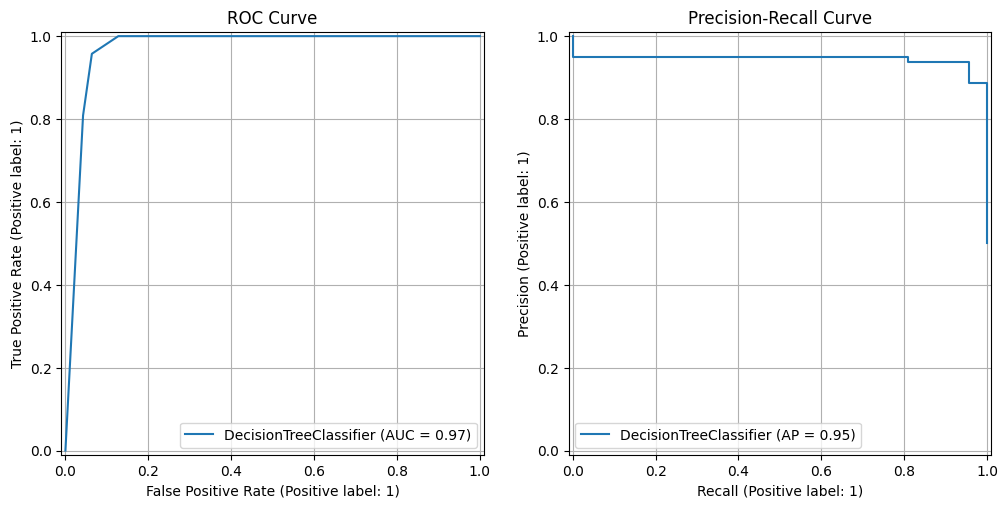

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(
    grid_search_1.best_estimator_,
    test_data1.drop(columns=["Type"]),
    test_data1["Type"],
    ax=axes[0]
)
axes[0].set_title("ROC Curve")
axes[0].grid(True)


PrecisionRecallDisplay.from_estimator(
    grid_search_1.best_estimator_,
    test_data1.drop(columns=["Type"]),
    test_data1["Type"],
    ax=axes[1],
)
axes[1].set_title("Precision-Recall Curve")
axes[1].grid(True)

Показники `AUC` та `AP` дуже гарні, що каже про те, що модель і не перенавчена, і гарно натренована.

### Візуалізація `grid_search_1.best_estimator_`

Частина дерева рішення `grid_search_1.best_estimator_`.

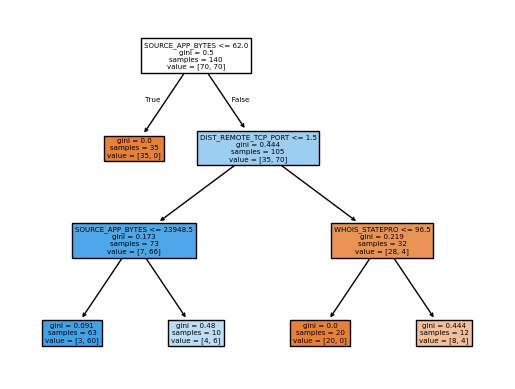

In [15]:
_ = plot_tree(
  grid_search_1.best_estimator_, 
  feature_names=data1.columns, 
  filled=True,
  max_depth=3
)

## `DecisionTreeClassifier` для набору (b)

###  EDA згенерованого набору даних

Згенеруємо набір даних за допомогою `numpy`.

In [16]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

data2 = pd.DataFrame({
  "X1": X[:,0],
  "X2": X[:,1],
  "Y": Y
})

Вигляд згенерованих даних `data2`.

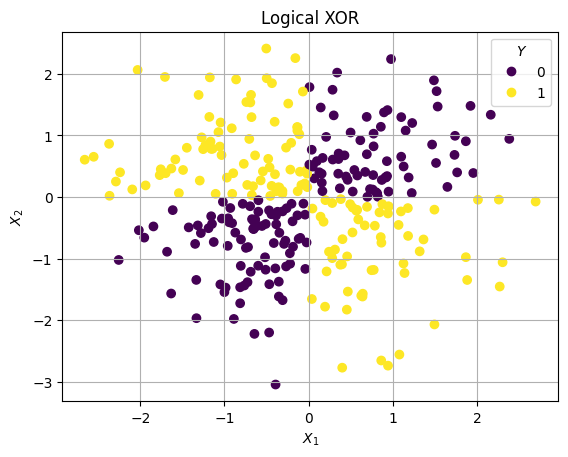

In [17]:
scatter = plt.scatter(data2["X1"],data2["X2"], c=data2["Y"], cmap='viridis')
plt.title("Logical XOR")
plt.legend(*scatter.legend_elements(), title="$Y$")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

Перевіримо, чи `data2` збалансована по `Y`.

In [18]:
data2["Y"].value_counts()

Y
0    158
1    142
Name: count, dtype: int64

Цей набір даних є збалансованим, проте дані є типу XOR, а отже дерева рішень не можуть знайти легкого рішення.

### Split Data

Розбиваємо `data2` на тренувальну `train_data2` та тестову вибірки `test_data2`.

In [19]:
train_data2, test_data2= train_test_split(
  data2,
  test_size=0.4,
  random_state=42,
  stratify=data2["Y"].values
)


Збережемо підвибірки для lab3.

In [20]:
!mkdir data\logical_xor

A subdirectory or file data\logical_xor already exists.


In [21]:
train_data2.to_csv("data/logical_xor/train.csv",index=False)
test_data2.to_csv("data/logical_xor/test.csv",index=False)

### Пошук найкращих параметрів `DecisionTreeClassifier`

`grid_search_2` шукає найкращі параметри `DecisionTreeClassifier` на даних `data2`.

In [22]:
grid_search_2 = GridSearchCV(
  estimator=DecisionTreeClassifier(),
  param_grid={
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2,3],
    "min_samples_split": [5,10],
    "min_samples_leaf": [1,2],
    "max_leaf_nodes": [5,7],
    },
  scoring=["f1"],
  return_train_score=True,
  refit="f1",
  cv=3,
  verbose=1,
  error_score='raise'

)

Виконаємо пошук параметрів `grid_search_2`.

In [23]:
%%time
_ = grid_search_2.fit(
  train_data2[["X1", "X2"]],
  train_data2["Y"]
)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
CPU times: total: 2.62 s
Wall time: 2.84 s


Параметри `grid_search_2.best_estimator_`.

In [24]:
print(grid_search_2.best_params_)
print("f1:",grid_search_2.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
f1: 0.9713405238828968


Значення метрик якості для найкращої моделі відображено у першому стовпці у таблиці вище.

### Метрики якості `grid_search_2.best_estimator_`

Визначимо прогнози моделі `grid_search_2.best_estimator_` на тестовій вибірці `test_data2`:

In [25]:
y_pred_2 = grid_search_2\
  .best_estimator_\
    .predict(
        test_data2[["X1", "X2"]]
    )

Метрики якості на спрогнозованих значеннях:

In [26]:
precision, recall, f1, _ = precision_recall_fscore_support(
  test_data2["Y"],
  y_pred_2,
  average='binary' 
)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Confusion matrix:\n{confusion_matrix(test_data2["Y"],y_pred_2)}")

Precision: 0.9636363636363636
Recall: 0.9298245614035088
F1: 0.9464285714285714
Confusion matrix:
[[61  2]
 [ 4 53]]


Відображемо ROC криву та AUC, Precision-Recall криву та Average Precision, границі рішень `grid_search_2.best_estimator_`:

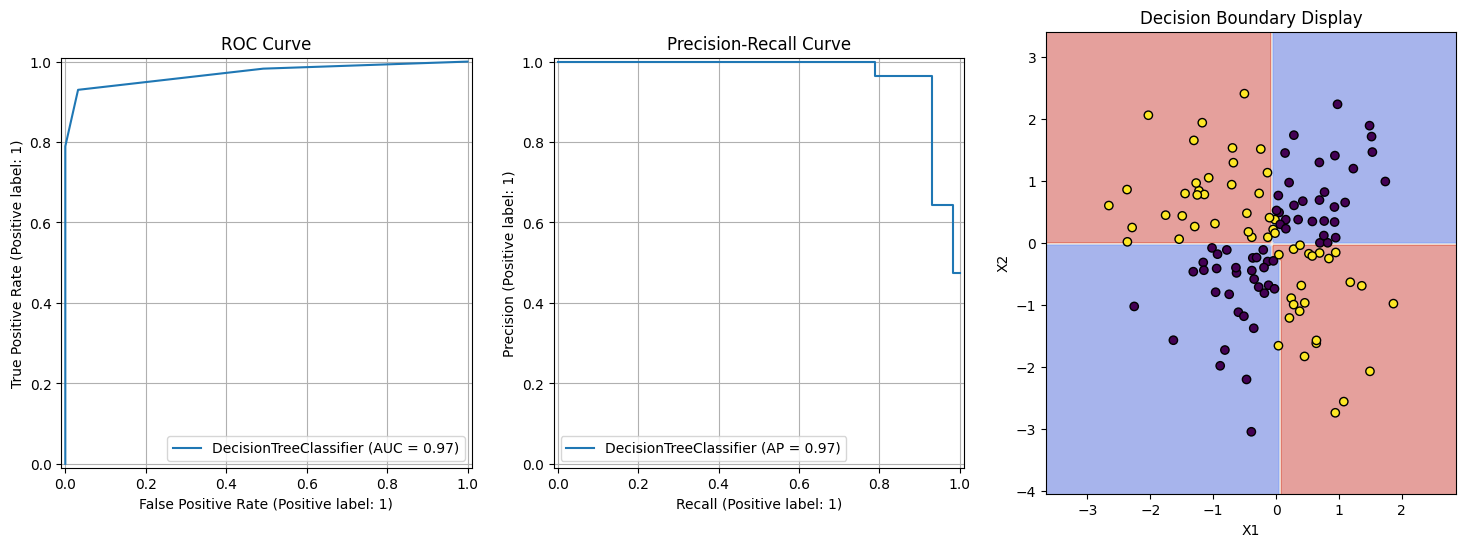

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

RocCurveDisplay.from_estimator(
    grid_search_2.best_estimator_,
    test_data2[["X1", "X2"]],
    test_data2["Y"],
    ax=axes[0]
)
axes[0].set_title("ROC Curve")
axes[0].grid(True)

PrecisionRecallDisplay.from_estimator(
    grid_search_2.best_estimator_,
    test_data2[["X1", "X2"]],
    test_data2["Y"],
    ax=axes[1]
)
axes[1].set_title("Precision-Recall Curve")
axes[1].grid(True)


disp = DecisionBoundaryDisplay.from_estimator(
    grid_search_2.best_estimator_,
    test_data2[["X1", "X2"]],
    response_method="predict",
    xlabel="X1",
    ylabel="X2",
    alpha=0.5,
    cmap="coolwarm",
    ax=axes[2]
)
axes[2].set_title("Decision Boundary Display")



disp.ax_.scatter(test_data2["X1"], test_data2["X2"], c=test_data2["Y"], edgecolor="k")

### Візуалізація `grid_search_2.best_estimator_`

Частина дерева рішення `grid_search_2.best_estimator_`:

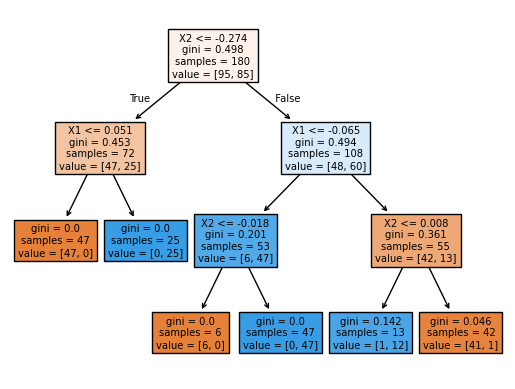

In [28]:
_ = plot_tree(
  grid_search_2.best_estimator_, 
  feature_names=["X1","X2"], 
  filled=True,
)

## Висновки

Для обох наборів даних було побудовано моделі для оптимізації гіперпараметрів класифікаторів.

Набір даних `dataset_Malicious_and_Bening_Websites` виявився незбалансованим, тому довелося виконати **undersampling**. Для пошуку найкращих гіперпараметрів моделей класифікації `DecisionTreeClassifier` для обох наборів даних, був виконаний решітчастий пошук `GridSearchCV`. Потім перевірили метрики якості моделей. Значення метрик AP (середня точність) та AUC значно наблизилися до одиниці для обох кращих моделей - це дуже гарний результат. 

Розмір вибірки та збалансованість класів є критичними чинниками, що впливають на навчання моделі. При незбалансованості класів існує висока ймовірність перенавчання моделі на класі більшості, в той час як при обмеженій кількості даних, навіть якщо класи збалансовані, також може виникати перенавчання через високу специфікацію моделі до навчальної вибірки.